In [3]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random


In [4]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4] 
true_b = 4.2 
features = torch.randn(num_examples, num_inputs, dtype=torch.float32) 
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [5]:
print(labels[0], features[0])

tensor(6.3077) tensor([ 0.0969, -0.5591])


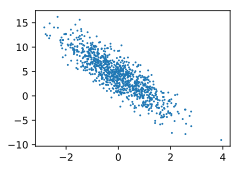

In [6]:
def use_svg_display():
    #display by vector 
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    #set the dimensions of picture
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [7]:
def data_iter(batch_size, features, label):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) #samples should be read in a random order
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i + batch_size, num_examples)]) #use min to check bound 
        yield features.index_select(0, j), labels.index_select(0, j) 

        
batch_size = 10

for X,y in data_iter(batch_size, features, labels):
    print(X,y)
    break
    
testTensor = torch.randn(3, 4, 4)
print('test: ', testTensor)
indexTensor = torch.tensor([0, 2])

print(testTensor.index_select(2, indexTensor))



tensor([[ 0.5179, -0.1809],
        [-0.5155, -0.0242],
        [-1.3618, -0.5422],
        [ 0.6617, -0.4238],
        [-0.6942,  1.1104],
        [-0.3489,  1.7499],
        [-0.2120,  0.1689],
        [-1.2591, -1.1105],
        [-0.2261, -0.6425],
        [-0.3227, -0.2089]]) tensor([ 5.8573,  3.2434,  3.3211,  6.9588, -0.9682, -2.4727,  3.2189,  5.4477,
         5.9247,  4.2539])
test:  tensor([[[ 2.1259,  0.2423, -0.8048,  0.0969],
         [ 0.2990,  0.8096, -0.0294, -0.4305],
         [-0.4587,  0.0201,  0.5297,  0.3180],
         [ 1.3781,  0.0382,  0.5853,  0.6478]],

        [[-1.0792,  0.6374,  0.9297,  1.4456],
         [ 0.9665, -0.8205,  1.0812, -0.6036],
         [ 0.1070,  1.3207, -0.6691,  1.1385],
         [-0.9648,  0.5032, -1.6033,  0.2709]],

        [[ 0.5065,  2.5942, -0.7673, -1.4859],
         [ 0.8951,  1.7792,  0.3440, -0.8223],
         [ 0.2258, -1.9687,  0.5956, -1.5535],
         [ 0.9861,  0.0843,  1.1521,  0.9198]]])
tensor([[[ 2.1259, -0.8048],
      

In [9]:

w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
 
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)